In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
param = pd.read_csv('parameter yg tersedia')
#param.pop('Unnamed: 0')
param

,source_id,parallax,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,logg_gspphot,teff_gspphot,mh_gspphot
0,3421375900092772352,0.807234,13.880873,0.986093,NaN,NaN,4.0996,9442.5350,-0.7773
1,3422425109064461184,0.591876,14.216793,0.849067,NaN,NaN,4.1700,7989.1950,-0.5155
2,507587382602316544,0.670442,14.406285,1.488364,5.927681,5.506062,3.5397,8880.6710,-0.1447
3,3443191237286001024,0.519595,14.077073,0.488182,NaN,NaN,4.0373,9553.6650,-1.3164
4,199846855507462144,4.264049,10.235985,0.719276,-21.439533,0.450973,4.1341,6833.2060,-0.6632
...,...,...,...,...,...,...,...,...,...
573,3383098876674928896,0.810216,11.949348,0.207321,-4.424756,5.843917,3.9871,8983.1570,-0.4072
574,603085739904178816,2.256620,11.406276,0.826352,9.941437,0.291888,4.0421,5654.9280,-0.1531
575,3140492456344220544,0.836845,11.474646,1.158264,49.908546,0.626855,3.1232,5858.4624,-0.1219
576,1341799048000581376,1.660910,12.558516,0.978560,-28.108750,0.777249,4.0685,5478.9644,-0.2601


In [5]:
df1 = param.copy()

In [6]:
n, bins = np.histogram(df1.teff_gspphot, bins=100)

In [7]:
x = pd.DataFrame({'bins' : bins})
teff = []
for i in x.index:
    if i+1 > max(x.index):
        break
    else :
        teffmean = (x.bins[i] + x.bins[i+1])/2
        teff.append(teffmean)

In [8]:
df2 = pd.DataFrame({'n_obj' : n,
                   'teff' : teff})

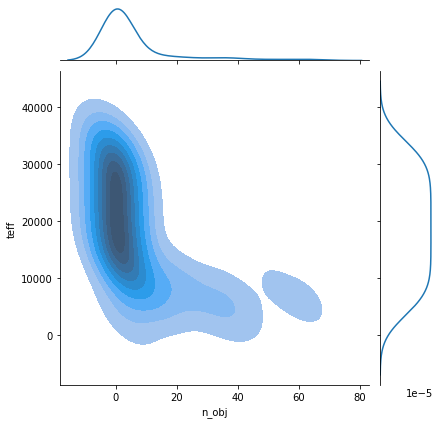

In [11]:
sns.jointplot(x=df2.n_obj, y=df2.teff, kind="kde", shade=True)

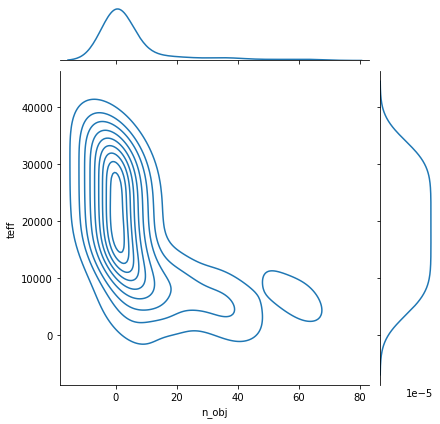

In [12]:
sns.jointplot(x=df2.n_obj, y=df2.teff, kind="kde")

In [70]:
teffdata = param.copy()
df2 = pd.read_csv('teffdata_sc_id.csv')

In [71]:
teffdata = teffdata.merge(df2, on = 'source_id', how = 'left')

In [72]:
n, bins = np.histogram(teffdata.teff_gspphot)

In [73]:
x = pd.DataFrame({'bins' : bins})
teff = []
for i in x.index:
    if i+1 > max(x.index):
        break
    else :
        teffmean = (x.bins[i] + x.bins[i+1])/2
        teff.append(teffmean)

In [74]:
df2 = pd.DataFrame({'n_obj' : n,
                   'Temperatur Efektif (K)' : teff})

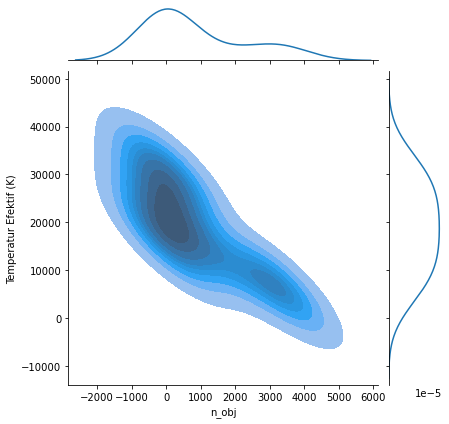

In [75]:
sns.jointplot(x=df2.n_obj, y=df2['Temperatur Efektif (K)'], kind="kde", shade=True)
plt.show()

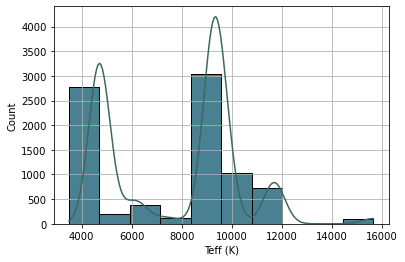

In [76]:
teff = teffdata.copy()
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000],  palette="dark:#5A9_r", bins=10)
sns.histplot(x=teff.teff_gspphot[teff.teff_gspphot < 16000], kde="True",bins=10, color='#3c685f')
plt.xlabel('Teff (K)')
plt.grid()

# LOG G

In [80]:
teffdata = param.copy()
df2 = pd.read_csv('loggdata_sc_id.csv')

In [81]:
teffdata = teffdata.merge(df2, on = 'source_id', how = 'left')

In [82]:
n, bins = np.histogram(teffdata.logg_gspphot)

In [83]:
x = pd.DataFrame({'bins' : bins})
teff = []
for i in x.index:
    if i+1 > max(x.index):
        break
    else :
        teffmean = (x.bins[i] + x.bins[i+1])/2
        teff.append(teffmean)

In [84]:
df2 = pd.DataFrame({'n_obj' : n,
                   'Gravitasi Permukaan (Log G)' : teff})

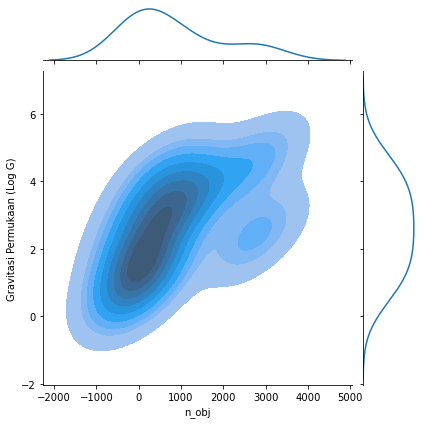

In [86]:
sns.jointplot(x=df2.n_obj, y=df2['Gravitasi Permukaan (Log G)'], kind="kde", shade=True)
plt.show()

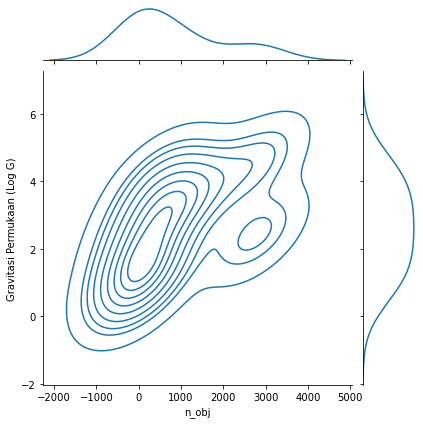

In [87]:
sns.jointplot(x=df2.n_obj, y=df2['Gravitasi Permukaan (Log G)'], kind="kde")
plt.show()

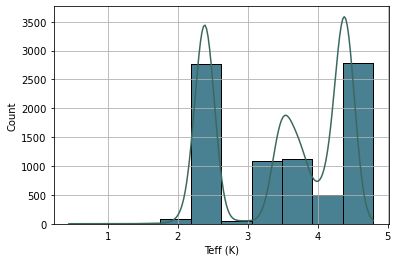

In [90]:
teff = teffdata.copy()
sns.histplot(x=teff.logg_gspphot,  palette="dark:#5A9_r", bins=10)
sns.histplot(x=teff.logg_gspphot, kde="True",bins=10, color='#3c685f')
plt.xlabel('Teff (K)')
plt.grid()

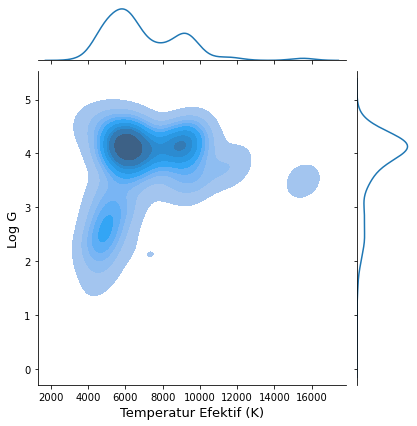

In [101]:
param1 = param[param.teff_gspphot < 16000]
g = sns.jointplot(x=param1.teff_gspphot, y=param1.logg_gspphot, kind="kde", shade=True)
g.set_axis_labels('Temperatur Efektif (K)', 'Log G', fontsize=13)

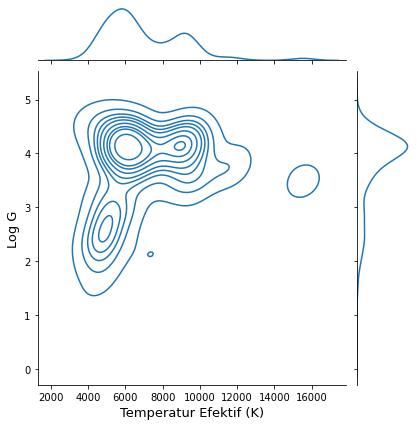

In [102]:
param1 = param[param.teff_gspphot < 16000]
g = sns.jointplot(x=param1.teff_gspphot, y=param1.logg_gspphot, kind="kde")
g.set_axis_labels('Temperatur Efektif (K)', 'Log G', fontsize=13)

In [110]:
try1 = param1[['teff_gspphot', 'logg_gspphot']]

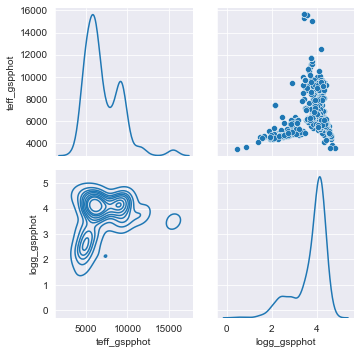

In [125]:
sns.set_style(style='darkgrid')
g = sns.PairGrid(try1, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

In [128]:
lamost = pd.read_csv('lamost_full')
lamost.head(3)

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,tcomment,offsets,offsets_v,ra,dec,wd_subclass,teff,teff_err,logg,logg_err
0,101076,G12763484624375,2676893926929699200,J220838.58-013731.7,2011-10-24,55859,55858,F5902,1,76,...,.,0,0.0,332.160763,-1.625490,DA,-9999.00,-9999.00,-9999.000,-9999.000
1,101151,G12762587004699,2677056689010163456,J220823.66-011534.2,2011-10-24,55859,55858,F5902,1,151,...,.,0,0.0,332.098588,-1.259508,DA,24000.00,672.02,8.263,0.076
2,112211,G13351718912434,2679476512239443328,J221640.39+012741.2,2011-10-24,55859,55858,F5902,12,211,...,.,0,0.0,334.168324,1.461445,DA,17122.64,221.39,7.933,0.037


In [130]:
lamost['source_id'] = lamost.gaia_source_id.tolist()
teffdata = lamost[['source_id','wd_subclass']]
teffdata = lamost.merge(param, on = 'source_id', how = 'inner')

In [131]:
nyoba = teffdata.copy()

for i in nyoba.index:
    if (nyoba.wd_subclass[i] != 'DA') & (nyoba.wd_subclass[i] != 'DAZ') :
        nyoba.wd_subclass[i] = 'DAZ'

C:\Users\pc\AppData\Local\Temp/ipykernel_14476/3629853161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyoba.wd_subclass[i] = 'DAZ'


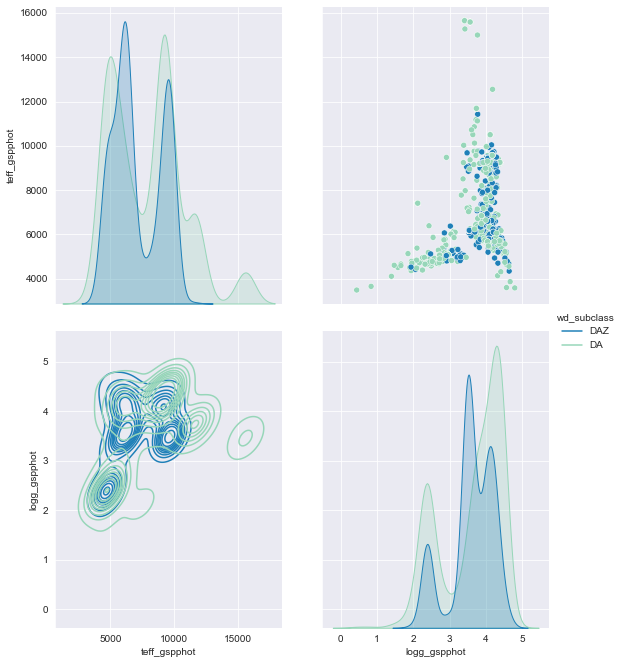

In [140]:
nyoba = nyoba[nyoba.teff_gspphot < 16000]
variables = ['teff_gspphot', 'logg_gspphot']
g = sns.PairGrid(nyoba, hue="wd_subclass", vars=variables, palette='YlGnBu_r',diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, shade=True)
g.fig.set_size_inches(8,10)
g.add_legend()

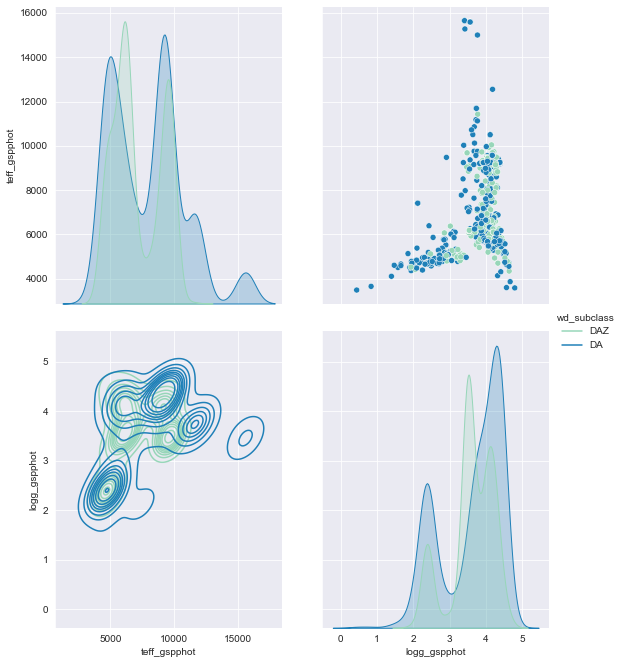

In [141]:
variables = ['teff_gspphot', 'logg_gspphot']
g = sns.PairGrid(nyoba, hue="wd_subclass", vars=variables, palette='YlGnBu',diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, shade=True)
g.fig.set_size_inches(8,10)
g.add_legend()